<a href="https://colab.research.google.com/github/coll-j/Tugas-KK/blob/master/Minggu-1/EDA_KK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline   

!wget https://raw.githubusercontent.com/coll-j/Tugas-KK/master/Minggu-1/data.csv

--2020-10-06 01:51:50--  https://raw.githubusercontent.com/coll-j/Tugas-KK/master/Minggu-1/data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1475504 (1.4M) [text/plain]
Saving to: ‘data.csv’

data.csv            100%[===================>]   1.41M  --.-KB/s    in 0.06s   

2020-10-06 01:51:50 (24.1 MB/s) - ‘data.csv’ saved [1475504/1475504]



# Load Dataset

Load dataset menggunakan fungsi `read_csv` pada Pandas, fungsi tersebut mengembalikan Dataframe berisi dataset yang diload. 

Print beberapa baris pertama dari dataframe tersebut menggunakan fungsi `head` untuk memberikan gambaran isi data.

In [2]:
df = pd.read_csv('data.csv')
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [ ]:
df.dtypes

Make                  object
Model                 object
Year                   int64
Engine Fuel Type      object
Engine HP            float64
Engine Cylinders     float64
Transmission Type     object
Driven_Wheels         object
Number of Doors      float64
Market Category       object
Vehicle Size          object
Vehicle Style         object
highway MPG            int64
city mpg               int64
Popularity             int64
MSRP                   int64
dtype: object

Fungsi `len` memberikan jumlah record yang tersimpan pada dataset. Pada dataset ini berisi **11914** record.

Fungsi `describe` memberikan gambaran seperti jumlah (bukan nan), rata-rata, min, max, dll pada kolom numerik. Dari data **count** terlihat di beberapa kolum memiliki nilai kosong.

In [ ]:
len(df)

11914

In [ ]:
df.describe(include='all')

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
count,11914,11914,11914.000000,11911,11845.00000,11884.000000,11914,11914,11908.000000,8172,11914,11914,11914.000000,11914.000000,11914.000000,1.191400e+04
unique,48,915,NaN,10,NaN,NaN,5,4,NaN,71,3,16,NaN,NaN,NaN,NaN
top,Chevrolet,Silverado 1500,NaN,regular unleaded,NaN,NaN,AUTOMATIC,front wheel drive,NaN,Crossover,Compact,Sedan,NaN,NaN,NaN,NaN
freq,1123,156,NaN,7172,NaN,NaN,8266,4787,NaN,1110,4764,3048,NaN,NaN,NaN,NaN
mean,NaN,NaN,2010.384338,NaN,249.38607,5.628829,NaN,NaN,3.436093,NaN,NaN,NaN,26.637485,19.733255,1554.911197,4.059474e+04
std,NaN,NaN,7.579740,NaN,109.19187,1.780559,NaN,NaN,0.881315,NaN,NaN,NaN,8.863001,8.987798,1441.855347,6.010910e+04
min,NaN,NaN,1990.000000,NaN,55.00000,0.000000,NaN,NaN,2.000000,NaN,NaN,NaN,12.000000,7.000000,2.000000,2.000000e+03
25%,NaN,NaN,2007.000000,NaN,170.00000,4.000000,NaN,NaN,2.000000,NaN,NaN,NaN,22.000000,16.000000,549.000000,2.100000e+04
50%,NaN,NaN,2015.000000,NaN,227.00000,6.000000,NaN,NaN,4.000000,NaN,NaN,NaN,26.000000,18.000000,1385.000000,2.999500e+04
75%,NaN,NaN,2016.000000,NaN,300.00000,6.000000,NaN,NaN,4.000000,NaN,NaN,NaN,30.000000,22.000000,2009.000000,4.223125e+04


# Data cleaning

Dapat terlihat dari cell sebelumnya kolom yang memiliki nilai null adalah:
- Engine HP
- Engine Cylinder
- Engine Fuel Type
- Number of Doors
- Market Category
 
Untuk data cleaning yang akan dilakukan adalah:
- null replacement pada kolom engine hp, cylinder, fuel type
- drop kolom num of doors, market category

## Null Replacement Engine Cylinders

Karena jumlah silinder dapat dilihat dari mobilnya, maka dicek mobil apa saja yang memiliki nilai null dengan mengelompokkan berdasarkan brand dan jenisnya. Di sini dapat terlihat ada 6 mobil yang memiliki record null pada Engine Cylinder.

In [3]:
list(df[df['Engine Cylinders'].isnull()].groupby(['Make','Model']).groups.keys())

[('Chevrolet', 'Bolt EV'),
 ('Mazda', 'RX-7'),
 ('Mazda', 'RX-8'),
 ('Mitsubishi', 'i-MiEV'),
 ('Toyota', 'RAV4 EV'),
 ('Volkswagen', 'e-Golf')]

Setelah melakukan pencarian, ternyata 4 dari mobil tersebut (kecuali Mazda) adalah mobil elektrik yang mesinnya tidak memiliki silinder. Untuk mobil Mazda pun menggunakan mesin *Wankel* yang tidak memiliki silinder. Maka untuk kolom ini nilai null akan diganti dengan 0.

In [4]:
df.loc[df['Engine Cylinders'].isnull(), 'Engine Cylinders'] = 0
df['Engine Cylinders'].describe()

count    11914.000000
mean         5.614655
std          1.800554
min          0.000000
25%          4.000000
50%          6.000000
75%          6.000000
max         16.000000
Name: Engine Cylinders, dtype: float64

## Null Replacement Engine HP

Pada kolom ini nilai null diganti dengan nilai tengah karena nilai rata-rata bisa jadi terpengaruh oleh outlier

In [5]:
print(df['Engine HP'].mean())
print(df['Engine HP'].median())

249.38607007176023
227.0


In [6]:
df.loc[df['Engine HP'].isnull(), 'Engine HP'] = df['Engine HP'].median()
df['Engine HP'].describe()

count    11914.000000
mean       249.256421
std        108.888444
min         55.000000
25%        170.000000
50%        227.000000
75%        300.000000
max       1001.000000
Name: Engine HP, dtype: float64

## Null Replacement Fuel Type

Nilai null pada fuel type diganti dengan modus dari keseluruhan kolom dengan asumsi mobil memakai bahan bakar yang sering dipakai.

In [7]:
print(df['Engine Fuel Type'].mode()[0])
print(df['Engine Fuel Type'].isnull().sum())

regular unleaded
3


In [8]:

df.loc[df['Engine Fuel Type'].isnull(), 'Engine Fuel Type'] = df['Engine Fuel Type'].mode()[0]
df['Engine Fuel Type'].describe()

count                11914
unique                  10
top       regular unleaded
freq                  7175
Name: Engine Fuel Type, dtype: object

## Drop

Kolom Number of Doors dan Market Category didrop selain karena memiliki null value yang banyak, dianggap kurang berpengaruh pada harga mobil.

In [ ]:
#drop nan
remove_nan = df.dropna()

In [9]:
df.drop(['Number of Doors', 'Market Category'], axis=1, inplace=True)
df.describe(include='all')

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
count,11914,11914,11914.000000,11914,11914.000000,11914.000000,11914,11914,11914,11914,11914.000000,11914.000000,11914.000000,1.191400e+04
unique,48,915,NaN,10,NaN,NaN,5,4,3,16,NaN,NaN,NaN,NaN
top,Chevrolet,Silverado 1500,NaN,regular unleaded,NaN,NaN,AUTOMATIC,front wheel drive,Compact,Sedan,NaN,NaN,NaN,NaN
freq,1123,156,NaN,7175,NaN,NaN,8266,4787,4764,3048,NaN,NaN,NaN,NaN
mean,NaN,NaN,2010.384338,NaN,249.256421,5.614655,NaN,NaN,NaN,NaN,26.637485,19.733255,1554.911197,4.059474e+04
std,NaN,NaN,7.579740,NaN,108.888444,1.800554,NaN,NaN,NaN,NaN,8.863001,8.987798,1441.855347,6.010910e+04
min,NaN,NaN,1990.000000,NaN,55.000000,0.000000,NaN,NaN,NaN,NaN,12.000000,7.000000,2.000000,2.000000e+03
25%,NaN,NaN,2007.000000,NaN,170.000000,4.000000,NaN,NaN,NaN,NaN,22.000000,16.000000,549.000000,2.100000e+04
50%,NaN,NaN,2015.000000,NaN,227.000000,6.000000,NaN,NaN,NaN,NaN,26.000000,18.000000,1385.000000,2.999500e+04
75%,NaN,NaN,2016.000000,NaN,300.000000,6.000000,NaN,NaN,NaN,NaN,30.000000,22.000000,2009.000000,4.223125e+04


# Data Visualization

Melihat distribusi jumlah mobil per tahun dalam data.

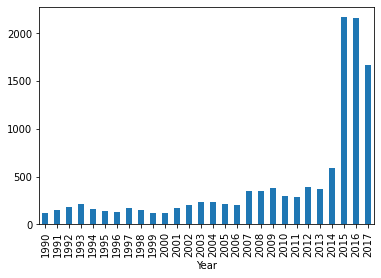

In [ ]:
df_year_dist = df.groupby('Year')['Make'].count()
df_year_dist.plot.bar()

## Harga per Tahun sesuai merk

Distribusi harga mobil per tahun dikategorikan sesuai merk pada tahun sebelum 200

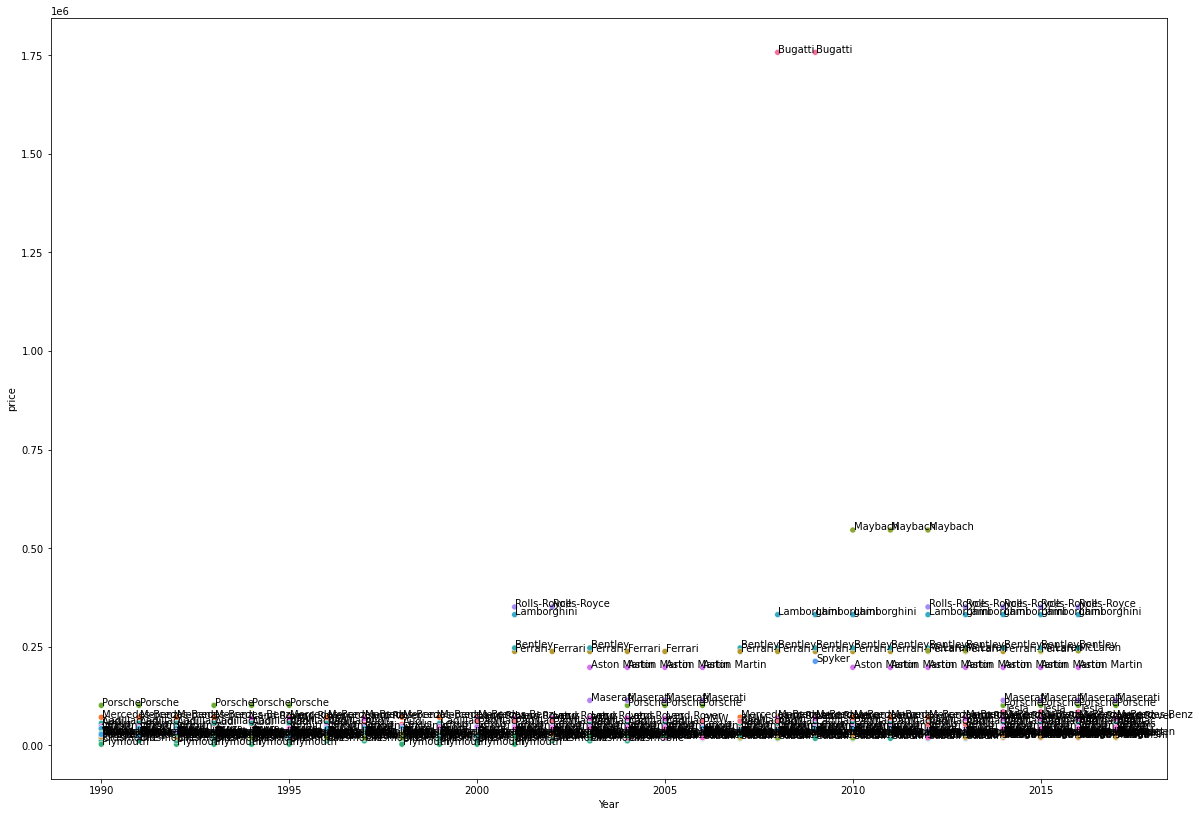

In [11]:
fig, ax = plt.subplots(figsize=(20, 14))
df_by_brand = df
df_by_brand['price'] = df_by_brand.groupby(['Make'])['MSRP'].transform('mean')
df_by_brand = df_by_brand.loc[:, ('Make', 'Year', 'price')]
df_by_brand.drop_duplicates(inplace=True)
sns.scatterplot(data=df_by_brand, x='Year', y='price', hue='Make', legend=False)
a = pd.concat({'x': df_by_brand['Year'], 'y': df_by_brand['price'], 'val': df_by_brand['Make']}, axis=1)
for i, point in a.iterrows():
  ax.text(point['x']+.02, point['y'], str(point['val']))

https://www.autoblog.com/buy/2008-Bugatti-Veyron/specs/
https://www.edmunds.com/bugatti/veyron-164/2008/coupe/#:~:text=For%20those%20who%20aren't,at%20a%20cool%20%242.0%20million.

In [ ]:
fig, ax = plt.subplots(figsize=(20, 14))
df_after_2000 = df.loc[df['Year'] >= 2000]
df_after_2000['price'] = df_after_2000.groupby(['Make'])['MSRP'].transform('mean')
df_after_2000 = df_after_2000.loc[:, ('Make', 'Year', 'price')]
df_after_2000.drop_duplicates(inplace=True)
sns.scatterplot(data=df_after_2000, x='Year', y='price', hue='Make', legend=False)
a = pd.concat({'x': df_after_2000['Year'], 'y': df_after_2000['price'], 'val': df_after_2000['Make']}, axis=1)
for i, point in a.iterrows():
  ax.text(point['x']+.02, point['y'], str(point['val']))

## Popularitas dan Harga
10 merk dengan popularitas berdasarkan rata-ratanya.
Jika popularitas merupakan faktor yang sangat mempengaruhi harga mobil, semakin tinggi popularitas maka harga semakin tinggi.

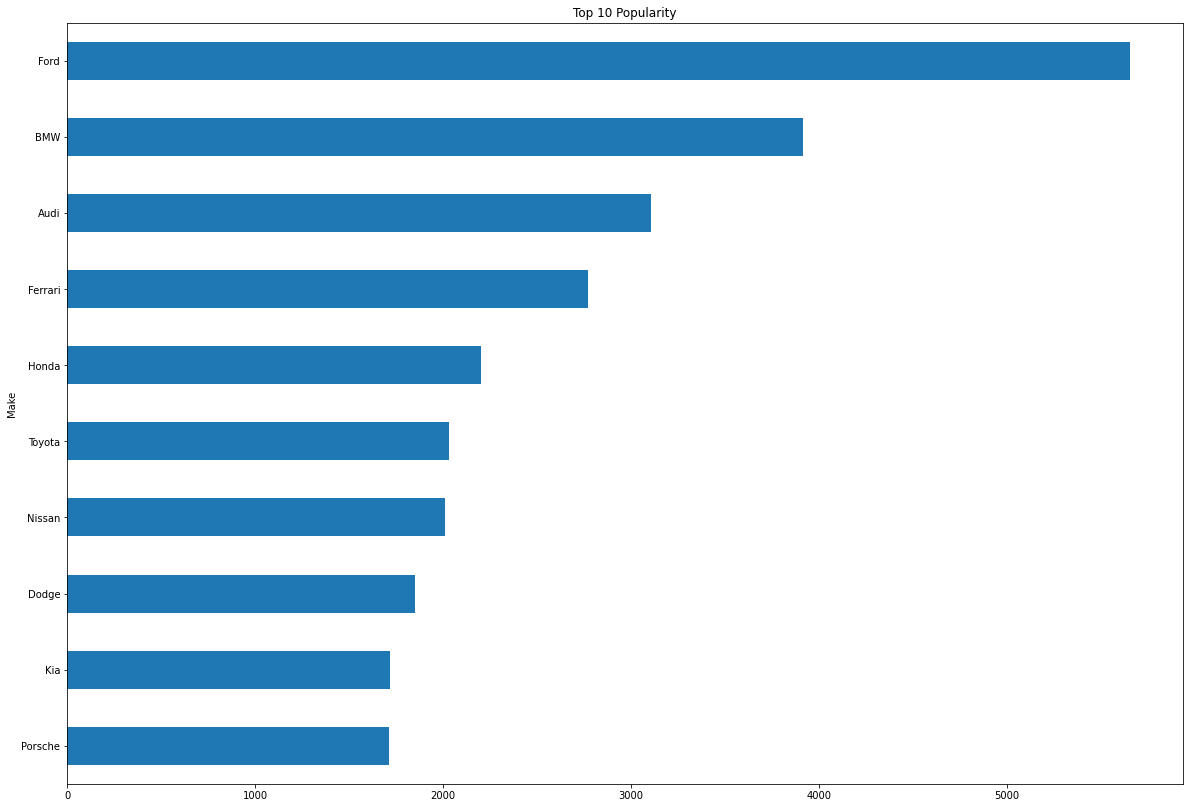

In [ ]:
df_pop = df.groupby('Make')['Popularity'].mean().sort_values()
df_pop.tail(10).plot(kind='barh', figsize=(20, 14), title='Top 10 Popularity')

Jika dilihat dari scatterplot antara popularitas dan harga, terlihat bahwa popularitas tidak mempengaruhi harga mobil. Mobil dengan popularitas > 5000 memiliki harga lebih rendah dari mobil dengan popularitas yang lebih rendah.

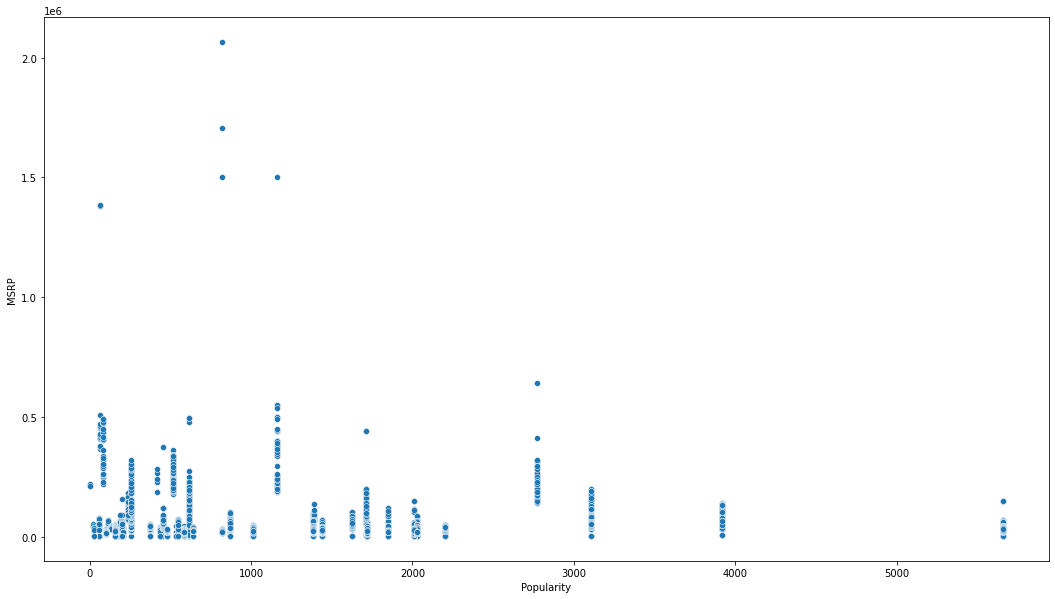

In [ ]:
fig, ax = plt.subplots(figsize=(18, 10))
sns.scatterplot(data=df, x='Popularity', y='MSRP')

## Distribusi Bahan Bakar

Sebelum tahun 2000

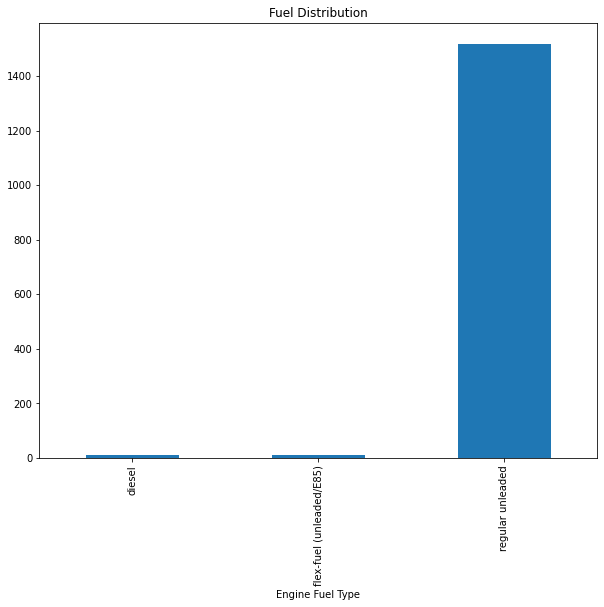

In [ ]:
df_fuel_bfr_2000 = df.loc[df['Year'] < 2000]
df_fuel_bfr_2000 = df_fuel_bfr_2000.groupby('Engine Fuel Type')['Year'].count().sort_values()
df_fuel_bfr_2000.plot.bar(figsize=(10, 8), title='Fuel Distribution')

Setelah tahun 2000 terdapat penambahan jenis bahan bakar. Ini terjadi karena inovasi yang ada, seperti mobil elektrik

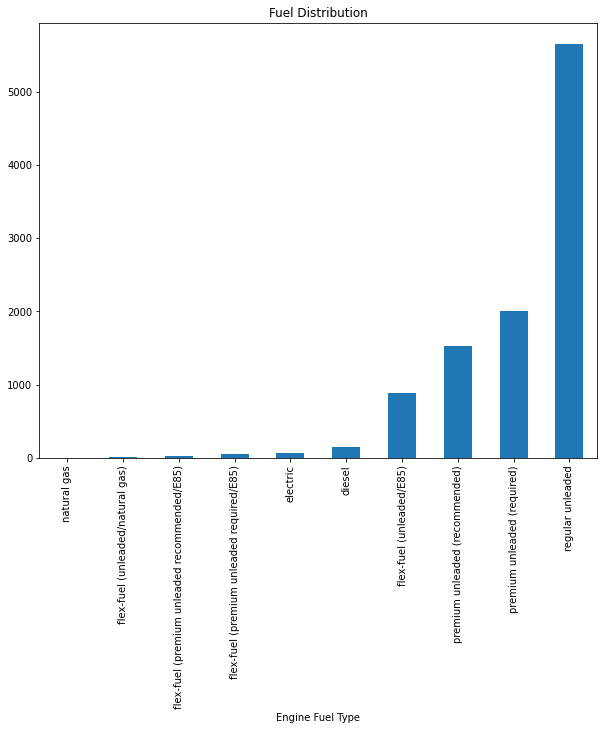

In [ ]:
df_fuel_aft_2000 = df.loc[df['Year'] >= 2000]
df_fuel_aft_2000 = df_fuel_aft_2000.groupby('Engine Fuel Type')['Year'].count().sort_values()
df_fuel_aft_2000.plot.bar(figsize=(10, 8), title='Fuel Distribution')

## Distribusi jumlah mobil

Sebelum tahun 2000

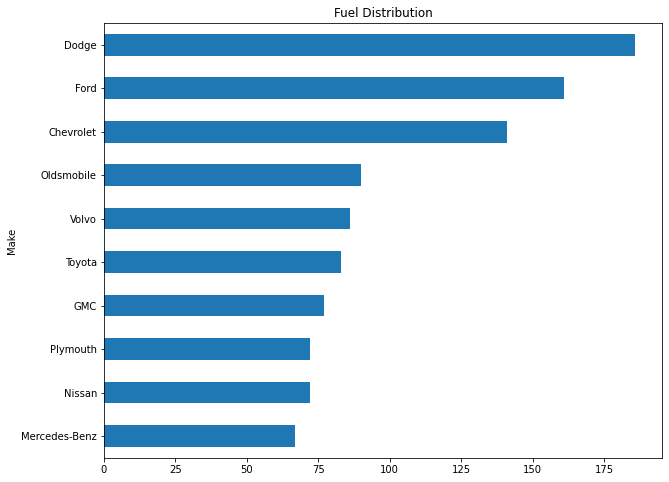

In [ ]:
df_brand_bfr_2000 = df.loc[df['Year'] < 2000]
df_brand_bfr_2000 = df_brand_bfr_2000.groupby('Make')['Year'].count().sort_values()
df_brand_bfr_2000.tail(10).plot(kind='barh', figsize=(10, 8), title='Top 10 Brand before 2000')

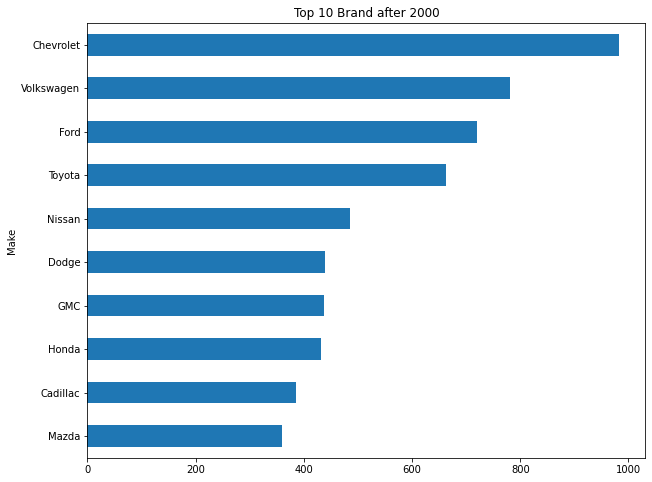

In [ ]:
df_brand_aft_2000 = df.loc[df['Year'] >= 2000]
df_brand_aft_2000 = df_brand_aft_2000.groupby('Make')['Year'].count().sort_values()
df_brand_aft_2000.tail(10).plot(kind='barh', figsize=(10, 8), title='Top 10 Brand after 2000')

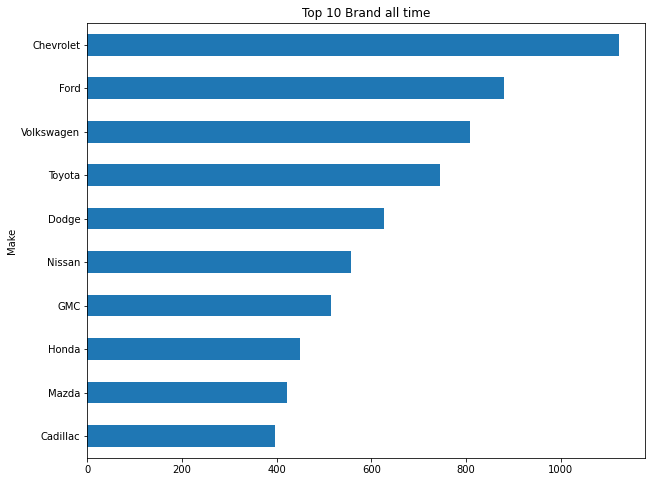

In [ ]:
df_brand = df.groupby('Make')['Year'].count().sort_values()
df_brand.tail(10).plot(kind='barh', figsize=(10, 8), title='Top 10 Brand all time')

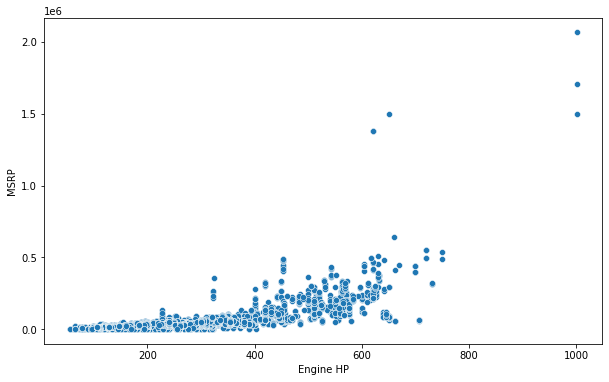

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.scatterplot(data=df, x='Engine HP', y='MSRP', legend=False)
# sns.scatterplot(data=df, x='Engine HP', y='MSRP', hue='Make', legend=False)
# a = pd.concat({'x': df['Engine HP'], 'y': df['MSRP'], 'val': df['Make']}, axis=1)
# for i, point in a.iterrows():
#   ax.text(point['x']+.02, point['y'], str(point['val']))

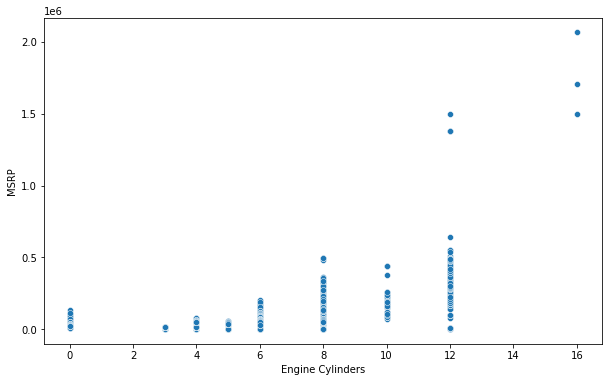

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.scatterplot(data=df, x='Engine Cylinders', y='MSRP', legend=False)
# sns.scatterplot(data=df, x='Engine HP', y='MSRP', hue='Make', legend=False)
# a = pd.concat({'x': df['Engine HP'], 'y': df['MSRP'], 'val': df['Make']}, axis=1)
# for i, point in a.iterrows():
#   ax.text(point['x']+.02, point['y'], str(point['val']))

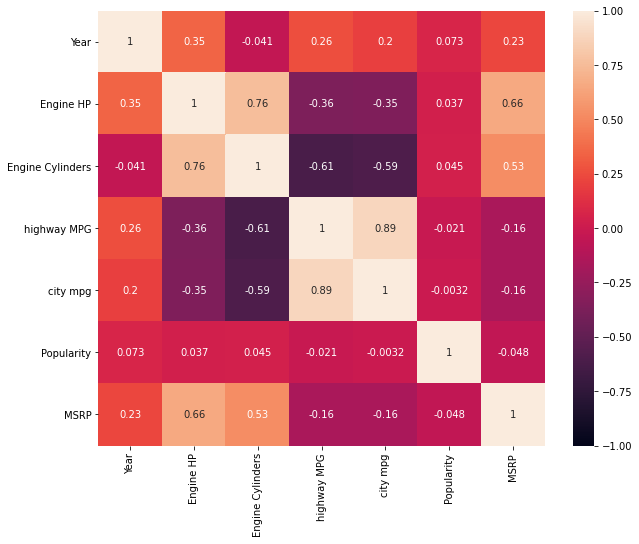

In [ ]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, vmin=-1.0, vmax=1.0, ax=ax)

# Kesimpulan

  EDA Merupakan proses memahami kumpulan data dengan meringkas karakteristik utama data tersebut, yang kemudian hasilnya ditampilkan secara visual. EDA sangat penting dilakukan terutama ketika kita ingin melakukan pemodelan data untuk penerapan Machine Learning.

  Proses pertama yang harus dilakukan tentunya memasukan data ke Data Frame. Data Frame yang digunakan kali ini adalah Pandas, dengan bahasa pemrograman python. Kemudian harus dikakukan Data Cleaning, Data Cleaning penting dilakukan karena terkadang ada data tidak digunakan atau memiliki nilai null. Terakhir, Data Visualization, yaitu menampilkan data yang telah diolah secara visual.

Dari visualisasi data tersebut, dapat disimpulkan bahwa harga mobil (MSRP) paling dipengaruhi oleh HP mesin.

  

Dalam EDA, pada saat tertentu akan muncul suatu kasus yang disebut Outliers. Outliers merupakan sebuah kasus dimana muncul suatu titik dalam data yang sudah divisualisasi yang posisinya jauh dari titik-titik lainnya. Outliers merupakan salah satu faktor yang menyebabkan data menjadi tidak akurat, maka dari itu Outliers perlu dihilangkan.

**Additional note:** EDA ini berdasarkan data yang digunakan, belum tentu persis dengan kenyataannya